# Neural Networks 
# Perceptron and Adaline

## Training Set  P1-P25

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
df = pd.read_csv("C:/Users/DELL/Downloads/ANN/PPfileS.csv")
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
0,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,-1,1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,-1,1,-1,-1,-1
5,1,1,1,1,1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,1,-1,-1,-1,-1,1,-1
7,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
9,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [2]:
# Define the input patterns P1 to P25 from the above dataframe df
input_patterns = np.array([
    [-1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1],
    [-1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1],
    [-1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1],
    [-1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1],
    [-1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1],
    [1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1],
    [1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1 ,1],
    [1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1],
    [1, 1, 1, 1, 1, -1, 1, 1, 1,-1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1],
    [-1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1],
    [1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1],
    [-1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1],
    [-1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1],
    [-1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1],
    [1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1],
])

### Displaying figures for Training Set

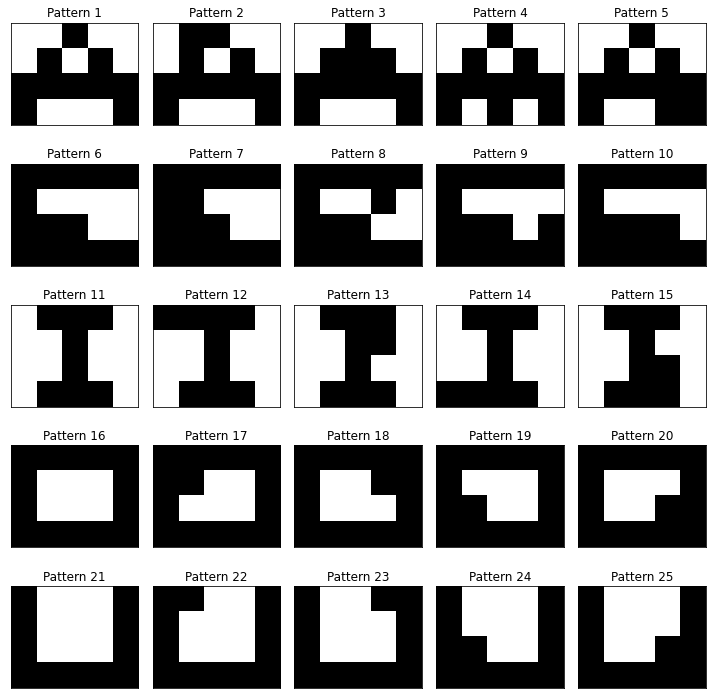

In [3]:
# Reshape the input patterns into 5x4 matrices
reshaped_patterns = input_patterns.reshape((25, 5, 4))

# Transpose the 5x4 matrices to get 4x5 matrices
transposed_patterns = np.transpose(reshaped_patterns, (0, 2, 1))

# Define the custom colormap with 0 (white) and 1 (black)
cmap = plt.cm.colors.ListedColormap(['white', 'black'])

# Create a subplot grid for 5 rows and 5 columns
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Iterate through the patterns and display them in the subplots
for i, ax in enumerate(axes.flat):
    # Display the transposed pattern
    ax.matshow(transposed_patterns[i], cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Pattern {i + 1}')

plt.tight_layout()
plt.show()

## CREATING 3 PROGRESSIVELY MORE CHALLENGING TEST SETS

In [4]:
#toggle function 
def toggle(colin, x, y):
    indx = (x - 1) * 4 + y-1
    oldval = colin[indx]
    colout = colin.copy()
    colout[indx] = oldval * (-1)
    return colout

### Creation of test set TSET1 (Lowest noise set)

In [5]:
p101 = np.array([-1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1])       # perfect A
p106 = np.array([1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1])           # perfect E
p111 = np.array([-1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1])     # perfect I
p116 = np.array([1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1])           # perfect O
p121 = np.array([1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1])        # perfect U

# Call the toggle function for distorted A s,
p102 = toggle(p101, 4, 1)
p103 = toggle(p101, 5, 3)
p104 = toggle(p101, 2, 4)
p105 = toggle(p101, 1, 2)

# Call the toggle function for distorted E s,
p107 = toggle(p106, 2, 4)
p108 = toggle(p106, 5, 2)
p109 = toggle(p106, 4, 3)
p110 = toggle(p106, 1, 3)

# Call the toggle function for distorted I s,
p112 = toggle(p111, 4, 4)
p113 = toggle(p111, 2, 4)
p114 = toggle(p111, 2, 2)
p115 = toggle(p111, 3, 4)

# Call the toggle function for distorted O s,
p117 = toggle(p116, 1, 3)
p118 = toggle(p116, 3, 2)
p119 = toggle(p116, 5, 4)
p120 = toggle(p116, 3, 3)

# Call the toggle function for distorted U s,
p122 = toggle(p121, 5, 3)
p123 = toggle(p121, 3, 4)
p124 = toggle(p121, 1, 4)
p125 = toggle(p121, 5, 4)

# Combine all patterns into an array
test_set1 = np.vstack([p101,p102,p103,p104,p105,p106,p107,p108,p109,p110,p111,p112,p113,p114,p115,p116,p117,p118,p119,p120,p121,p122,p123,p124,p125])

# Print the test_set1
print(test_set1)

[[-1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1]
 [-1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1  1]
 [-1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1]
 [-1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1]
 [-1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1]
 [ 1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1]
 [-1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1

### Displaying figures for TSET1

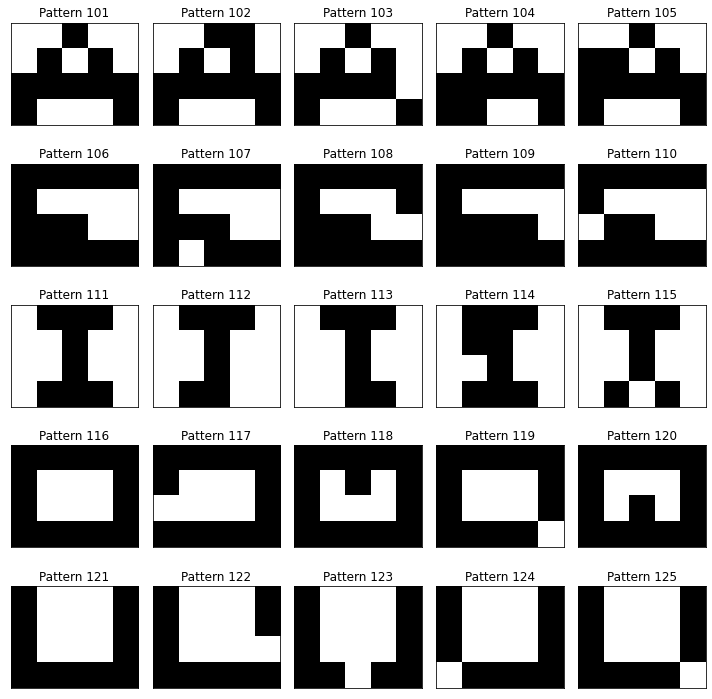

In [6]:
# Reshape the input patterns into 5x4 matrices
conv_t_set1 = test_set1.reshape((25, 5, 4))

# Transpose the 5x4 matrices to get 4x5 matrices
mat_t_set1 = np.transpose(conv_t_set1, (0, 2, 1))

# Create a subplot grid for 5 rows and 5 columns
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Iterate through the patterns and display them in the subplots
for i, ax in enumerate(axes.flat):
    # Display the transposed pattern
    ax.matshow(mat_t_set1[i], cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Pattern {i + 101}')

plt.tight_layout()
plt.show()

### Creation of test set TSET2(medium noise set)

In [7]:
p201 = p101      # perfect A
p206 = p106      # perfect E
p211 = p111      # perfect I
p216 = p116      # perfect O
p221 = p121      # perfect U

# Call the toggle function for distorted A s,
p202 = toggle(p102, 3, 2)
p203 = toggle(p103, 1, 3)
p204 = toggle(p104, 3, 3)
p205 = toggle(p105, 2, 1)

# Call the toggle function for distorted E s,
p207 = toggle(p107, 3, 2)
p208 = toggle(p108, 3, 3)
p209 = toggle(p109, 5, 4)
p210 = toggle(p110, 1, 2)

# Call the toggle function for distorted I s,
p212 = toggle(p112, 1, 3)
p213 = toggle(p113, 2, 2)
p214 = toggle(p114, 4, 3)
p215 = toggle(p115, 1, 4)

# Call the toggle function for distorted O s,
p217 = toggle(p117, 4, 3)
p218 = toggle(p118, 4, 3)
p219 = toggle(p119, 5, 1)
p220 = toggle(p120, 2, 4)

# Call the toggle function for distorted U s,
p222 = toggle(p122, 3, 3)
p223 = toggle(p123, 2, 2)
p224 = toggle(p124, 2, 1)
p225 = toggle(p125, 1, 3)

# Combine all patterns into an array
test_set2 = np.vstack([p201,p202,p203,p204,p205,p206,p207,p208,p209,p210,p211,p212,p213,p214,p215,p216,p217,p218,p219,p220,p221,p222,p223,p224,p225])

# Print the test_set2
print(test_set2)


[[-1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1]
 [-1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1  1]
 [-1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1]
 [-1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1]
 [-1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1]
 [ 1 -1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1]
 [-1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1]
 [-1 -1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1

### Displaying figures for TSET2

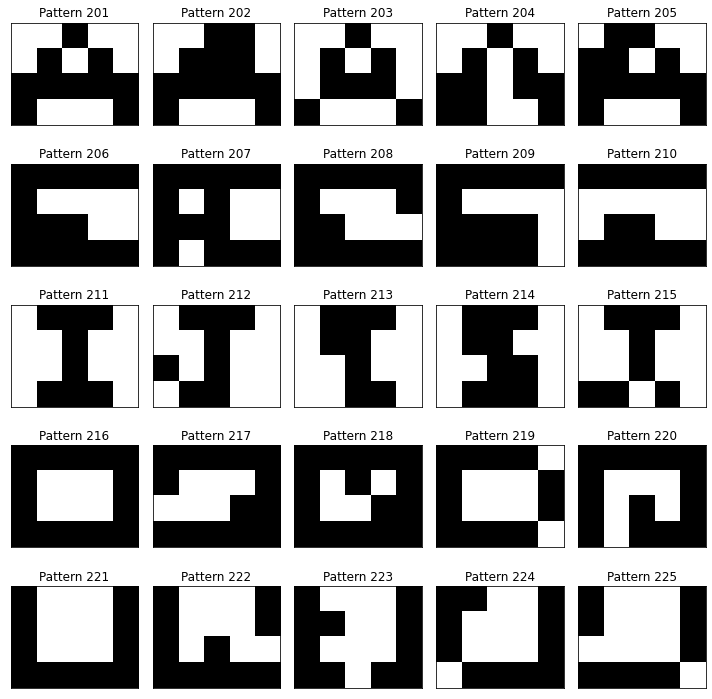

In [8]:
# Reshape the input patterns into 5x4 matrices
conv_t_set2 = test_set2.reshape((25, 5, 4))

# Transpose the 5x4 matrices to get 4x5 matrices
mat_t_set2 = np.transpose(conv_t_set2, (0, 2, 1))

# Create a subplot grid for 5 rows and 5 columns
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Iterate through the patterns and display them in the subplots
for i, ax in enumerate(axes.flat):
    # Display the transposed pattern
    ax.matshow(mat_t_set2[i], cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Pattern {i + 201}')

plt.tight_layout()
plt.show()

### Creation of test set TSET3 (highest noise set)

In [9]:
p301 = p101      # perfect A
p306 = p106      # perfect E
p311 = p111      # perfect I
p316 = p116      # perfect O
p321 = p121      # perfect U

# Call the toggle function for distorted A s,
p302 = toggle(p202, 5, 2)
p303 = toggle(p203, 3, 3)
p304 = toggle(p204, 1, 3)
p305 = toggle(p205, 5, 1)

# Call the toggle function for distorted E s,
p307 = toggle(p207, 3, 4)
p308 = toggle(p208, 1, 4)
p309 = toggle(p209, 5, 2)
p310 = toggle(p210, 1, 3)

# Call the toggle function for distorted I s,
p312 = toggle(p212, 1, 1)
p313 = toggle(p213, 1, 2)
p314 = toggle(p214, 2, 4)
p315 = toggle(p215, 2, 1)

# Call the toggle function for distorted O s,
p317 = toggle(p217, 1, 2)
p318 = toggle(p218, 4, 2)
p319 = toggle(p219, 3, 3)
p320 = toggle(p220, 1, 4)

# Call the toggle function for distorted U s,
p322 = toggle(p222, 3, 2)
p323 = toggle(p223, 5, 2)
p324 = toggle(p224, 5, 4)
p325 = toggle(p225, 4, 2)

# Combine all patterns into an array
test_set3 = np.vstack([p301,p302,p303,p304,p305,p306,p307,p308,p309,p310,p311,p312,p313,p314,p315,p316,p317,p318,p319,p320,p321,p322,p323,p324,p325])

# Print the test_set3
print(test_set3)

[[-1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1]
 [-1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1]
 [-1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1]
 [-1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1]
 [-1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1]
 [ 1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1 -1]
 [ 1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1]
 [-1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1

### Displaying figures for TSET3

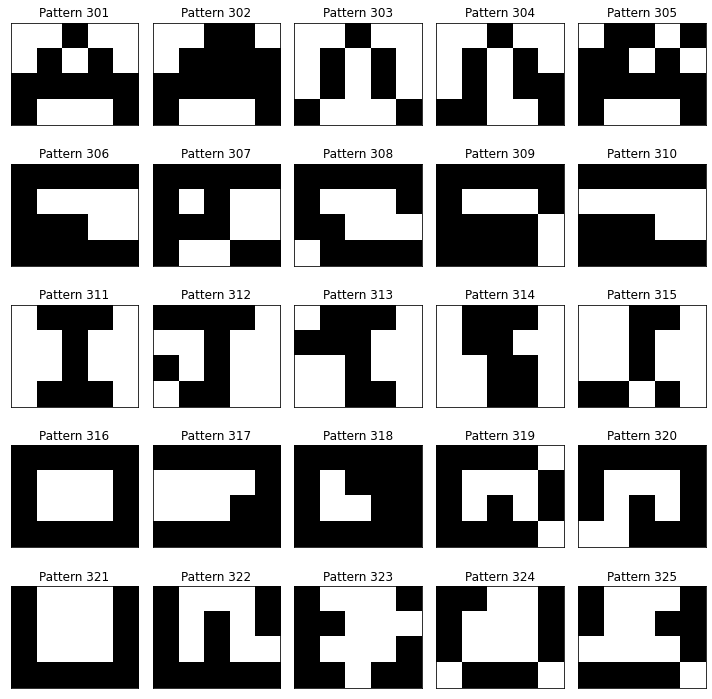

In [10]:
# Reshape the input patterns into 5x4 matrices
conv_t_set3 = test_set3.reshape((25, 5, 4))

# Transpose the 5x4 matrices to get 4x5 matrices
mat_t_set3 = np.transpose(conv_t_set3, (0, 2, 1))

# Create a subplot grid for 5 rows and 5 columns
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Iterate through the patterns and display them in the subplots
for i, ax in enumerate(axes.flat):
    # Display the transposed pattern
    ax.matshow(mat_t_set3[i], cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Pattern {i + 301}')

plt.tight_layout()
plt.show()

## TARGET ARRAYS OR TRUE LABELS for A & E

In [11]:
targetsA = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
targetsE = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

## PART I: PERCEPTRON
## I.1 “A DETECTOR” 
### Training 'A' Detector Perceptron

In [12]:

# Initialize weights and bias to zero
weights = np.zeros(input_patterns.shape[1])
weights = weights.astype(int)
bias = 0

# Initialize variables to track changes
changes = 0

# Initialize an array to save the number of changes in each epoch
changes_in_epochs = []

# Initialize a list to save the pattern that prompted changes in each epoch
patterns_with_changesA = []

# Maximum number of epochs
max_epochs = 20

# Training the perceptron
for epoch in range(max_epochs):
    changes = 0
    epoch_patternsA = []
    for i, pattern in enumerate(input_patterns):
        #print (pattern)
        net = np.dot(pattern, weights) + bias
        #coding for hardlims function
        if net < 0:
            a = -1
        else:
            a = 1
        if a != targetsA[i]:
            e = targetsA[i] -a
            # Update weights and bias
            weights = weights + (e * pattern)
            bias = bias + e
            changes = changes + 1
            epoch_patternsA.append(i + 1)  # Add pattern number to the list

    print(f"patterns that changed in epoch {epoch +1}: {epoch_patternsA}")
    changes_in_epochs.append(changes)  # Save the number of changes in this epoch
    patterns_with_changesA.append(epoch_patternsA)
    print(f"Number of Changes in weights in epoch {epoch + 1}:", changes)
    if changes == 0:
        # If there are no weight changes in an epoch, stop training
        break

print(f"Training complete in epoch {epoch + 1}. \nNumber of Changes in weights in each epoch: {changes_in_epochs}")
print(f"weights:{weights}")
print(f"bias:{bias}")
print(patterns_with_changesA)

patterns that changed in epoch 1: [6]
Number of Changes in weights in epoch 1: 1
patterns that changed in epoch 2: []
Number of Changes in weights in epoch 2: 0
Training complete in epoch 2. 
Number of Changes in weights in each epoch: [1, 0]
weights:[-2 -2 -2 -2 -2  2 -2 -2 -2  2 -2 -2 -2  2  2 -2 -2  2  2 -2]
bias:-2
[[6], []]


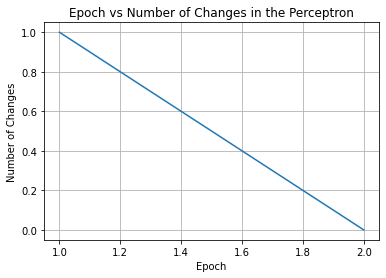

In [13]:
# Plot the graph for epoch vs number of changes
plt.plot(range(1, len(changes_in_epochs) + 1), changes_in_epochs)
plt.xlabel('Epoch')
plt.ylabel('Number of Changes')
plt.title('Epoch vs Number of Changes in the Perceptron')
plt.grid(True)
plt.show()

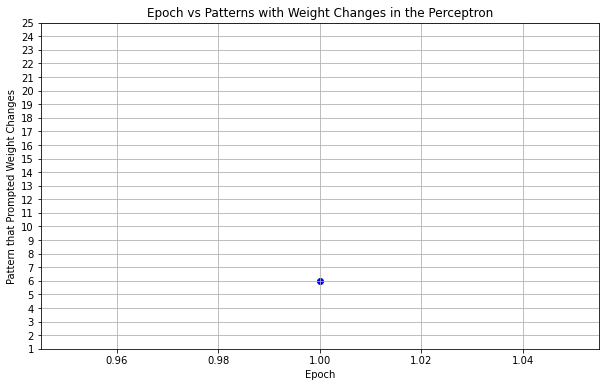

In [14]:
plt.figure(figsize=(10, 6))
# Plot the graph for epoch vs patterns that prompted weight changes
for epoch, patterns in enumerate(patterns_with_changesA, start=1):
    plt.scatter([epoch] * len(patterns), patterns, marker='o', color='b')
plt.xlabel('Epoch')
plt.ylabel('Pattern that Prompted Weight Changes')
plt.yticks(range(1, 26))
plt.title('Epoch vs Patterns with Weight Changes in the Perceptron')
plt.grid(True)
plt.show()

## Testing 'A' detector Perceptron

In [15]:
#final  trained weights and bias 
weightsA = np.array([-2, -2, -2, -2, -2, 2, -2, -2, -2, 2, -2, -2, -2, 2, 2, -2, -2, 2, 2, -2])
biasA = -2
targetsA = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

def test_perceptron(test_set, weights, bias):
    test_outputs = []
    for pattern in test_set:
        net = np.dot(pattern, weights) + bias
        # Apply the hardlims activation function
        if net < 0:
            output = -1
        else:
            output = 1
        test_outputs.append(output)
    return test_outputs

### TSET1 with 'A' Detector Perceptron

In [16]:
# Call the test_perceptron function to get the perceptron outputs
test_set_1A_outputs = test_perceptron(test_set1, weightsA, biasA)

# Print the perceptron outputs for the test set
print("Perceptron outputs for the test set_1_A:")
print(test_set_1A_outputs)

matches = np.sum(targetsA == test_set_1A_outputs)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsA)}")
Hit_Ratio = matches/len(targetsA)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")


Perceptron outputs for the test set_1_A:
[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


### TSET2 with 'A' Detector Perceptron

In [17]:
# Call the test_perceptron function to get the perceptron outputs
test_set_2A_outputs = test_perceptron(test_set2, weightsA, biasA)

# Print the perceptron outputs for the test set
print("Perceptron outputs for the test set_2_A:")
print(test_set_2A_outputs)

matches = np.sum(targetsA == test_set_2A_outputs)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsA)}")
Hit_Ratio = matches/len(targetsA)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Perceptron outputs for the test set_2_A:
[1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 24
Number of attempted classifications: 25
Hit Ratio: 0.96
Accuracy: 96.00%


### TSET3 with 'A' Detector Perceptron

In [18]:
# Call the test_perceptron function to get the perceptron outputs
test_set_3A_outputs = test_perceptron(test_set3, weightsA, biasA)

# Print the perceptron outputs for the test set
print("Perceptron outputs for the test set_3_A:")
print(test_set_3A_outputs)

matches = np.sum(targetsA == test_set_3A_outputs)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsA)}")
Hit_Ratio = matches/len(targetsA)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Perceptron outputs for the test set_3_A:
[1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 23
Number of attempted classifications: 25
Hit Ratio: 0.92
Accuracy: 92.00%


## Testing 'A' detector Perceptron with 25 Training Patterns

In [44]:
# Call the test_perceptron function to get the perceptron outputs
training_pattern_outputs_A = test_perceptron(input_patterns, weightsA, biasA)

# Print the perceptron outputs for the training patterns
print("Perceptron outputs for the training_patterns :")
print(training_pattern_outputs_A)

matches = np.sum(targetsA == training_pattern_outputs_A)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsA)}")
Hit_Ratio = matches/len(targetsA)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Perceptron outputs for the training_patterns :
[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


## I.2 “E DETECTOR”
### Training 'E' Detector Perceptron

In [19]:
# Initialize weights and bias to zero
weights = np.zeros(input_patterns.shape[1])
weights = weights.astype(int)
bias = 0

# Initialize variables to track changes
changes = 0

# Initialize an array to save the number of changes in each epoch
changes_in_epochs = []

# Initialize a list to save the pattern that prompted changes in each epoch
patterns_with_changesE = []

# Maximum number of epochs
max_epochs = 40

# Training the perceptron
for epoch in range(max_epochs):
    changes = 0
    epoch_patternsE = []
    for i, pattern in enumerate(input_patterns):
        #print (pattern)
        net = np.dot(pattern, weights) + bias
        #coding for hardlims function
        if net < 0:
            a = -1
        else:
            a = 1
        if a != targetsE[i]:
            e = targetsE[i] -a
            # Update weights and bias
            weights = weights + (e * pattern)
            bias = bias + e
            changes = changes + 1
            epoch_patternsE.append(i + 1)  # Add pattern number to the list

    print(f"patterns that changed in epoch {epoch +1}: {epoch_patternsE}")
    changes_in_epochs.append(changes)  # Save the number of changes in this epoch
    patterns_with_changesE.append(epoch_patternsE)
    print(f"Number of Changes in weights in epoch {epoch + 1}:", changes)
    if changes == 0:
        # If there are no weight changes in an epoch, stop training
        break

print(f"Training complete in {epoch + 1} epochs. \nNumber of Changes in weights in each epoch: {changes_in_epochs}")
print(f"weights:{weights}")
print(f"bias:{bias}")
print(patterns_with_changesE)

patterns that changed in epoch 1: [1, 11, 16]
Number of Changes in weights in epoch 1: 3
patterns that changed in epoch 2: [6, 19]
Number of Changes in weights in epoch 2: 2
patterns that changed in epoch 3: [6, 12, 24]
Number of Changes in weights in epoch 3: 3
patterns that changed in epoch 4: [1, 6, 12, 24]
Number of Changes in weights in epoch 4: 4
patterns that changed in epoch 5: [9, 19]
Number of Changes in weights in epoch 5: 2
patterns that changed in epoch 6: [2, 9, 12]
Number of Changes in weights in epoch 6: 3
patterns that changed in epoch 7: []
Number of Changes in weights in epoch 7: 0
Training complete in 7 epochs. 
Number of Changes in weights in each epoch: [3, 2, 3, 4, 2, 3, 0]
weights:[  2  14   2   2   2   2   6  -2  -6  -2   6  -2   6   2   2  -2  14  -6
 -10   2]
bias:-14
[[1, 11, 16], [6, 19], [6, 12, 24], [1, 6, 12, 24], [9, 19], [2, 9, 12], []]


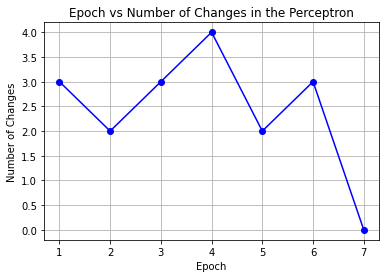

In [20]:
# Plot the graph for epoch vs number of changes
plt.plot(range(1, len(changes_in_epochs) + 1), changes_in_epochs, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Number of Changes')
plt.title('Epoch vs Number of Changes in the Perceptron')
plt.grid(True)
plt.show()

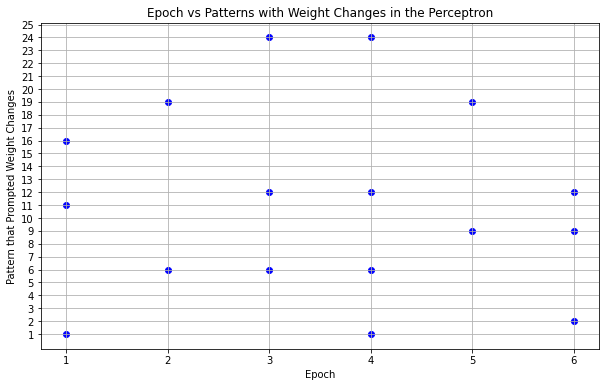

In [21]:
plt.figure(figsize=(10, 6))
# Plot the graph for epoch vs patterns that prompted weight changes
for epoch, patterns in enumerate(patterns_with_changesE, start=1):
    plt.scatter([epoch] * len(patterns), patterns, marker='o', color='b')
    
plt.xlabel('Epoch')
plt.ylabel('Pattern that Prompted Weight Changes')
plt.yticks(range(1, 26))
plt.title('Epoch vs Patterns with Weight Changes in the Perceptron')
plt.grid(True)
plt.show()

### Testing 'E' detector Perceptron

In [22]:
#final trained weights and bias 
weightsE = np.array([2, 14, 2, 2, 2, 2, 6, -2, -6, -2, 6, -2, 6, 2, 2, -2, 14, -6, -10, 2])
biasE = -14
targetsE = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### TSET1 with 'E' Detector Perceptron

In [23]:
# Call the test_perceptron function to get the perceptron outputs
test_set_1E_outputs = test_perceptron(test_set1, weightsE, biasE)

# Print the perceptron outputs for the test set
print("Perceptron outputs for the test set_1_E:")
print(test_set_1E_outputs)

matches = np.sum(targetsE == test_set_1E_outputs)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsE)}")
Hit_Ratio = matches/len(targetsE)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Perceptron outputs for the test set_1_E:
[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1]
Number of correct classficitaions: 24
Number of attempted classifications: 25
Hit Ratio: 0.96
Accuracy: 96.00%


### TSET2 with 'E' Detector Perceptron

In [24]:
# Call the test_perceptron function to get the perceptron outputs
test_set_2E_outputs = test_perceptron(test_set2, weightsE, biasE)

# Print the perceptron outputs for the test set
print("Perceptron outputs for the test set_2_E:")
print(test_set_2E_outputs)

matches = np.sum(targetsE == test_set_2E_outputs)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsE)}")
Hit_Ratio = matches/len(targetsE)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Perceptron outputs for the test set_2_E:
[-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1]
Number of correct classficitaions: 22
Number of attempted classifications: 25
Hit Ratio: 0.88
Accuracy: 88.00%


### TSET3 with 'E' Detector Perceptron

In [25]:
# Call the test_perceptron function to get the perceptron outputs
test_set_3E_outputs = test_perceptron(test_set3, weightsE, biasE)

# Print the perceptron outputs for the test set
print("Perceptron outputs for the test set_3_E:")
print(test_set_3E_outputs)

matches = np.sum(targetsE == test_set_3E_outputs)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsE)}")
Hit_Ratio = matches/len(targetsE)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Perceptron outputs for the test set_3_E:
[-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1]
Number of correct classficitaions: 22
Number of attempted classifications: 25
Hit Ratio: 0.88
Accuracy: 88.00%


## Testing 'E' detector Perceptron with 25 Training Patterns

In [45]:
# Call the test_perceptron function to get the perceptron outputs
training_pattern_outputs_E = test_perceptron(input_patterns, weightsE, biasE)

# Print the perceptron outputs for the training patterns
print("Perceptron outputs for the training_patterns :")
print(training_pattern_outputs_E)

matches = np.sum(targetsE == training_pattern_outputs_E)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsE)}")
Hit_Ratio = matches/len(targetsE)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Perceptron outputs for the training_patterns :
[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


## PART II: ADALINE:
## II.1 “A DETECTOR”
### Training 'A' Detector Adaline


In [26]:
# Initialize weights and bias to zero
weights = np.zeros(input_patterns.shape[1])
bias = 0

# Define the learning rates (alphas)
alpha_values = [0.1, 0.01, 0.001]

max_epochs = 20
t = 0     #count & iterate of alpha values

# Initialize dictionaries to track Mean Squared Error and weights for each alpha
mse_alpha = {}
bias_alpha = {}
w1_alpha = {}
w2_alpha = {}
w3_alpha = {}
w4_alpha = {}

# Adaline training algorithm
for alpha in alpha_values:
    # Initialize weights and bias to zero for each alpha
    weights = np.zeros(input_patterns.shape[1])
    bias = 0
    t += 1
    print(f"OBSERVATIONS FOR ALPHA_{t}: {alpha}")
    mse_values = []
    bias_values = []
    w1_values = []
    w2_values = []
    w3_values = []
    w4_values = []

    for epoch in range(max_epochs):
        mse = 0  # Initialize MSE for this epoch
        for i, pattern in enumerate(input_patterns):
            net = np.dot(pattern, weights) + bias
            error = targetsA[i] - net
            a = net  # Linear activation function
            weights = weights + (2 * alpha * error * pattern)  # Update weights
            bias = bias + (2 * alpha * error)  # Update bias
            mse = mse + (error ** 2)  # Accumulate squared error
        mse_values.append(mse / len(input_patterns))  # Calculate and save the average MSE
        bias_values.append(bias)
        w1_values.append(weights[0])
        w2_values.append(weights[1])
        w3_values.append(weights[2])
        w4_values.append(weights[3])
        
        
        if alpha == 0.01:     
            final_weights_alpha_0_01 = weights
            final_bias_alpha_0_01 = bias
        if alpha != 0.1:
            print(f"Epoch {epoch + 1}: MSE = {mse_values[-1]:.5f} ; W1 = {weights[0]:.4f}, W2 = {weights[1]:.4f}, W3 = {weights[2]:.4f}, W4 = {weights[3]:.4f}; bias = {bias:.4f} ")
        else:
            print(f"Epoch {epoch + 1}: MSE = {mse_values[-1]}")
    # Store the results for the current alpha
    mse_alpha[alpha] = mse_values
    bias_alpha[alpha] = bias_values
    w1_alpha[alpha] = w1_values
    w2_alpha[alpha] = w2_values
    w3_alpha[alpha] = w3_values
    w4_alpha[alpha] = w4_values

    
# Print the final weights for alpha = 0.01
print("Final Weights for alpha = 0.01:", [f"{w:.4f}" for w in final_weights_alpha_0_01])
print("Final Bias for alpha = 0.01:", f"{final_bias_alpha_0_01:.4f}")


OBSERVATIONS FOR ALPHA_1: 0.1
Epoch 1: MSE = 1882263820279.4207
Epoch 2: MSE = 1.03379380188956e+25
Epoch 3: MSE = 5.678317000573412e+37
Epoch 4: MSE = 3.1189279487043548e+50
Epoch 5: MSE = 1.7131328786732566e+63
Epoch 6: MSE = 9.409721251209038e+75
Epoch 7: MSE = 5.1684755530480135e+88
Epoch 8: MSE = 2.838887447279345e+101
Epoch 9: MSE = 1.5593150931259472e+114
Epoch 10: MSE = 8.564846633777523e+126
Epoch 11: MSE = 4.704411454972366e+139
Epoch 12: MSE = 2.5839910606681996e+152
Epoch 13: MSE = 1.4193082100750023e+165
Epoch 14: MSE = 7.7958311305666335e+177
Epoch 15: MSE = 4.282014476129916e+190
Epoch 16: MSE = 2.3519811636111482e+203
Epoch 17: MSE = 1.2918721841831072e+216
Epoch 18: MSE = 7.095863547238703e+228
Epoch 19: MSE = 3.8975434332824216e+241
Epoch 20: MSE = 2.1408028372014423e+254
OBSERVATIONS FOR ALPHA_2: 0.01
Epoch 1: MSE = 0.17213 ; W1 = -0.1087, W2 = -0.1033, W3 = -0.0042, W4 = -0.0096; bias = -0.0649 
Epoch 2: MSE = 0.04212 ; W1 = -0.0846, W2 = -0.0810, W3 = 0.0003, W4 = 

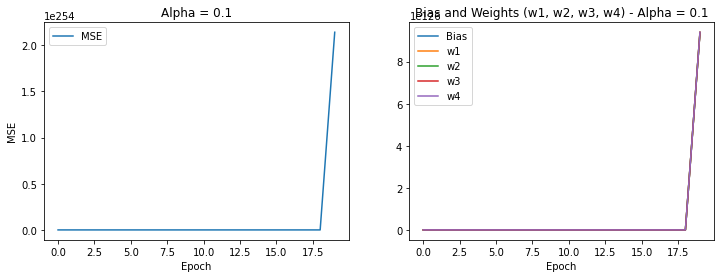

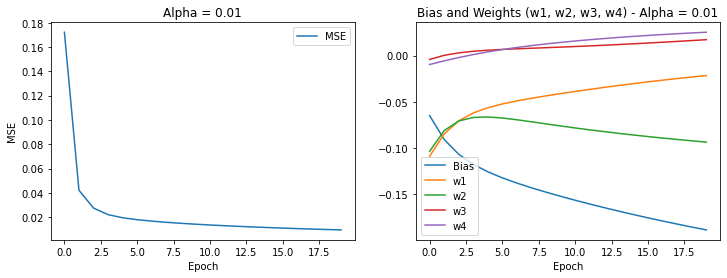

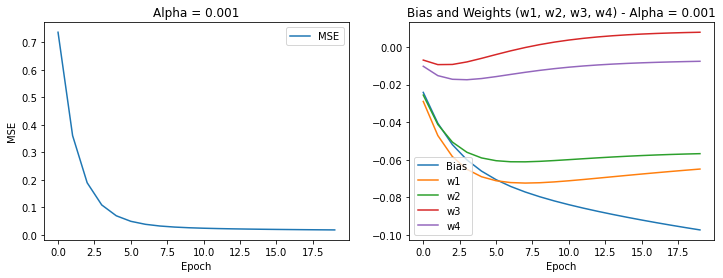

In [27]:
# Plot the values of bias, w1, w2, w3, and w4 vs. epoch for each alpha
for alpha in alpha_values:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(mse_alpha[alpha])), mse_alpha[alpha], label='MSE')
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title(f"Alpha = {alpha}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(len(bias_alpha[alpha])), bias_alpha[alpha], label='Bias')
    plt.plot(range(len(w1_alpha[alpha])), w1_alpha[alpha], label='w1')
    plt.plot(range(len(w2_alpha[alpha])), w2_alpha[alpha], label='w2')
    plt.plot(range(len(w3_alpha[alpha])), w3_alpha[alpha], label='w3')
    plt.plot(range(len(w4_alpha[alpha])), w4_alpha[alpha], label='w4')
    plt.xlabel("Epoch")
    plt.title(f"Bias and Weights (w1, w2, w3, w4) - Alpha = {alpha}")
    plt.legend()

plt.show()

## Testing 'A' Detector Adaline with best tranied weights when Alpha = 0.01

In [28]:
#final trained weights and bias
trained_weights_A = final_weights_alpha_0_01 
trained_bias_A = final_bias_alpha_0_01 
print(trained_weights_A)
print(trained_bias_A)

[-0.02156626 -0.09345598  0.01715754  0.02519263 -0.03635294  0.0852304
  0.05317853 -0.29885377  0.03025028 -0.05136438  0.01531267 -0.13729496
 -0.0319741   0.06539273  0.05787763 -0.16411643 -0.09345598 -0.01531267
  0.08650757  0.01715754]
-0.18824024664617364


In [29]:
def test_adaline(test_set, weights, bias):
    test_outputs = []
    for pattern in test_set:
        net = np.dot(pattern, weights) + bias
        #print(net)
        # Apply the hardlims activation function
        if net < 0:
            output = -1
        else:
            output = 1
        test_outputs.append(output)
    return test_outputs

### TSET1 with 'A' Detector Adaline

In [30]:
# Call the test_adaline function to get the adaline outputs
test_set_1A_outputs_Ada = test_adaline(test_set1, trained_weights_A, trained_bias_A)

# Print the adaline outputs for the test set
print("Adaline outputs for the test set_1_A:")
print(test_set_1A_outputs_Ada)

matches = np.sum(targetsA == test_set_1A_outputs_Ada)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsA)}")
Hit_Ratio = matches/len(targetsA)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Adaline outputs for the test set_1_A:
[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


### TSET2 with 'A' Detector Adaline

In [31]:
# Call the test_adaline function to get the adaline outputs
test_set_2A_outputs_Ada = test_adaline(test_set2, trained_weights_A, trained_bias_A)

# Print the adaline outputs for the test set
print("Adaline outputs for the test set_2_A:")
print(test_set_2A_outputs_Ada)

matches = np.sum(targetsA == test_set_2A_outputs_Ada)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsA)}")
Hit_Ratio = matches/len(targetsA)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Adaline outputs for the test set_2_A:
[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


### TSET3 with 'A' Detector Adaline

In [32]:
# Call the test_adaline function to get the adaline outputs
test_set_3A_outputs_Ada = test_adaline(test_set3, trained_weights_A, trained_bias_A)

# Print the adaline outputs for the test set
print("Adaline outputs for the test set_3_A:")
print(test_set_3A_outputs_Ada)

matches = np.sum(targetsA == test_set_3A_outputs_Ada)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsA)}")
Hit_Ratio = matches/len(targetsA)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Adaline outputs for the test set_3_A:
[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


### Testing 'A' detector Adaline with 25 Training Patterns

In [46]:
# Call the test_adaline function to get the adaline outputs
training_patterns_A_Ada = test_adaline(input_patterns, trained_weights_A, trained_bias_A)

# Print the adaline outputs for the training patterns
print("Adaline outputs for the training_patterns_A_Ada:")
print(training_patterns_A_Ada)

matches = np.sum(targetsA == training_patterns_A_Ada)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsA)}")
Hit_Ratio = matches/len(targetsA)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Adaline outputs for the training_patterns_A_Ada:
[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


## II.2 “E DETECTOR”
### Training 'E' Detector Adaline

In [49]:
# Initialize weights and bias to zero
weights = np.zeros(input_patterns.shape[1])
bias = 0

# Define the learning rates (alphas)
alpha_values = [0.1, 0.001, 0.0001]

# Maximum number of training epochs
max_epochs = 25
t = 0    

# Initialize dictionaries to track Mean Squared Error and weights for each alpha
mse_alpha = {}
bias_alpha = {}
w1_alpha = {}
w2_alpha = {}
w3_alpha = {}
w4_alpha = {}

# Filter all warnings
warnings.filterwarnings("ignore")

# Adaline training algorithm
for alpha in alpha_values:
    # Initialize weights and bias to zero for each alpha
    weights = np.zeros(input_patterns.shape[1])
    bias = 0
    t += 1
    print(f"OBSERVATIONS FOR ALPHA_{t}: {alpha}")
    mse_values = []
    bias_values = []
    w1_values = []
    w2_values = []
    w3_values = []
    w4_values = []

    for epoch in range(max_epochs):
        mse = 0  # Initialize MSE for this epoch
        for i, pattern in enumerate(input_patterns):
            net = np.dot(pattern, weights) + bias
            error = targetsE[i] - net
            a = net  # Linear activation function
            weights = weights + (2 * alpha * error * pattern)  # Update weights
            bias = bias + (2 * alpha * error)  # Update bias
            mse = mse + (error ** 2)  # Accumulate squared error
        mse_values.append(mse / len(input_patterns))  # Calculate and save the average MSE
        bias_values.append(bias)
        w1_values.append(weights[0])
        w2_values.append(weights[1])
        w3_values.append(weights[2])
        w4_values.append(weights[3])
        
        if alpha == 0.001:
            final_weights_alpha_0_001 = weights
            final_bias_alpha_0_001 = bias
        if alpha != 0.1:
            print(f"Epoch {epoch + 1}: MSE = {mse_values[-1]:.5f} ; W1 = {weights[0]:.4f}, W2 = {weights[1]:.4f}, W3 = {weights[2]:.4f}, W4 = {weights[3]:.4f}; bias = {bias:.4f} ")
        else:
            print(f"Epoch {epoch + 1}: MSE = {mse_values[-1]}")
    # Store the results for the current alpha
    mse_alpha[alpha] = mse_values
    bias_alpha[alpha] = bias_values
    w1_alpha[alpha] = w1_values
    w2_alpha[alpha] = w2_values
    w3_alpha[alpha] = w3_values
    w4_alpha[alpha] = w4_values


   
 # Print the final weights for alpha = 0.001
print("Final Weights for alpha = 0.001:", [f"{w:.4f}" for w in final_weights_alpha_0_001])
print("Final Bias for alpha = 0.001:", f"{final_bias_alpha_0_001:.4f}")


OBSERVATIONS FOR ALPHA_1: 0.1
Epoch 1: MSE = 1834573856139.0762
Epoch 2: MSE = 1.0076264680312522e+25
Epoch 3: MSE = 5.534587734272418e+37
Epoch 4: MSE = 3.039981805742235e+50
Epoch 5: MSE = 1.6697701478320317e+63
Epoch 6: MSE = 9.17154287346224e+75
Epoch 7: MSE = 5.03765136710406e+88
Epoch 8: MSE = 2.7670296750087875e+101
Epoch 9: MSE = 1.5198457901187845e+114
Epoch 10: MSE = 8.348053678659813e+126
Epoch 11: MSE = 4.5853336354827683e+139
Epoch 12: MSE = 2.518585212555193e+152
Epoch 13: MSE = 1.3833827540520647e+165
Epoch 14: MSE = 7.598503456101463e+177
Epoch 15: MSE = 4.173628347127212e+190
Epoch 16: MSE = 2.2924479380155425e+203
Epoch 17: MSE = 1.2591723822580094e+216
Epoch 18: MSE = 6.916253416048374e+228
Epoch 19: MSE = 3.798889015435801e+241
Epoch 20: MSE = 2.0866149464841795e+254
Epoch 21: MSE = 1.1461145395930183e+267
Epoch 22: MSE = 6.295260848580686e+279
Epoch 23: MSE = 3.4577965624400424e+292
Epoch 24: MSE = 1.899263168724422e+305
Epoch 25: MSE = inf
OBSERVATIONS FOR ALPHA_2

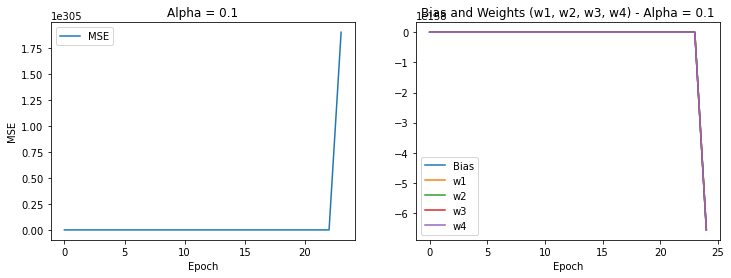

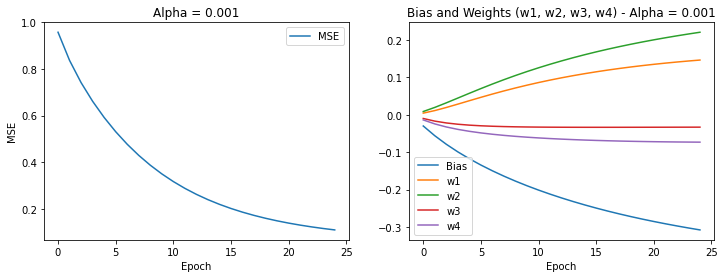

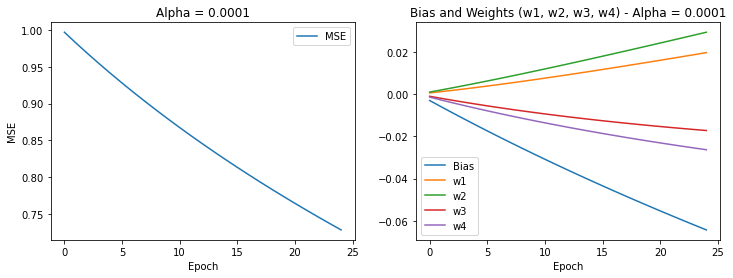

In [34]:
# Plot the values of bias, w1, w2, w3, and w4 vs. epoch for each alpha
for alpha in alpha_values:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(mse_alpha[alpha])), mse_alpha[alpha], label='MSE')
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title(f"Alpha = {alpha}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(len(bias_alpha[alpha])), bias_alpha[alpha], label='Bias')
    plt.plot(range(len(w1_alpha[alpha])), w1_alpha[alpha], label='w1')
    plt.plot(range(len(w2_alpha[alpha])), w2_alpha[alpha], label='w2')
    plt.plot(range(len(w3_alpha[alpha])), w3_alpha[alpha], label='w3')
    plt.plot(range(len(w4_alpha[alpha])), w4_alpha[alpha], label='w4')
    plt.xlabel("Epoch")
    plt.title(f"Bias and Weights (w1, w2, w3, w4) - Alpha = {alpha}")
    plt.legend()

plt.show()

## Testing 'E' Detector Adaline with best tranied weights when Alpha = 0.001

In [35]:
#final trained weights and bias
trained_weights_E = final_weights_alpha_0_001 
trained_bias_E = final_bias_alpha_0_001 
print(trained_weights_E)
print(trained_bias_E)


[ 0.14576987  0.22000851 -0.03334498 -0.07340166  0.04617479  0.06400435
  0.26843078 -0.05431692 -0.10991542 -0.02079806  0.12980594 -0.09405627
  0.10212764  0.02104366  0.00526549 -0.09286934  0.22000851 -0.12980594
 -0.28391449 -0.03334498]
-0.30767040851265054


### TSET1 with 'E' Detector Adaline

In [36]:
# Call the test_adaline function to get the adaline outputs
test_set_1E_outputs_Ada = test_adaline(test_set1, trained_weights_E, trained_bias_E)

# Print the adaline outputs for the test set
print("Adaline outputs for the test set_1_E:")
print(test_set_1E_outputs_Ada)

matches = np.sum(targetsE == test_set_1E_outputs_Ada)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsE)}")
Hit_Ratio = matches/len(targetsE)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Adaline outputs for the test set_1_E:
[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


### TSET2 with 'E' Detector Adaline

In [37]:
# Call the test_adaline function to get the adaline outputs
test_set_2E_outputs_Ada = test_adaline(test_set2, trained_weights_E, trained_bias_E)

# Print the adaline outputs for the test set
print("Adaline outputs for the test set_2_E:")
print(test_set_2E_outputs_Ada)

matches = np.sum(targetsE == test_set_2E_outputs_Ada)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsE)}")
Hit_Ratio = matches/len(targetsE)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Adaline outputs for the test set_2_E:
[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%


### TSET3 with 'E' Detector Adaline

In [38]:
# Call the test_adaline function to get the adaline outputs
test_set_3E_outputs_Ada = test_adaline(test_set3, trained_weights_E, trained_bias_E)

# Print the adaline outputs for the test set
print("Adaline outputs for the test set_3_E:")
print(test_set_3E_outputs_Ada)

matches = np.sum(targetsE == test_set_3E_outputs_Ada)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsE)}")
Hit_Ratio = matches/len(targetsE)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Adaline outputs for the test set_3_E:
[-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 24
Number of attempted classifications: 25
Hit Ratio: 0.96
Accuracy: 96.00%


### Testing 'E' detector Adaline with 25 Training Patterns

In [47]:
# Call the test_adaline function to get the adaline outputs
training_patterns_E_Ada = test_adaline(input_patterns, trained_weights_E, trained_bias_E)

# Print the adaline outputs for the training patterns
print("Adaline outputs for the training_patterns_E_Ada:")
print(training_patterns_E_Ada)

matches = np.sum(targetsE == training_patterns_E_Ada)
print(f"Number of correct classficitaions: {matches}")
print(f"Number of attempted classifications: {len(targetsE)}")
Hit_Ratio = matches/len(targetsE)
print(f"Hit Ratio: {Hit_Ratio}")
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Adaline outputs for the training_patterns_E_Ada:
[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Number of correct classficitaions: 25
Number of attempted classifications: 25
Hit Ratio: 1.0
Accuracy: 100.00%
